Credit Card Fraud Detection

Author: NDOU MPHO ALPHEUS

Domain: Data Science

Batch: June

Task: Credit Card Fraud Detection

Aim: To develop a model that identifies fraudulent credit card transactions by preprocessing and normalizing the data, handling class imbalance, and training a classification algorithm.

Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\ndoum\Downloads\creditcard.csv\creditcard.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Data Preprocessing

In [2]:
# Display dataset information
data.info()

# Separate data into fraud and non-fraud
Fraudulent_data = data[data['Class'] == 1]
Genuine_data = data[data['Class'] == 0]

# Statistical measures for the 'Amount' feature
print("Non-Fraudulent Transactions - Amount")
print(Genuine_data['Amount'].describe())

print("\nFraudulent Transactions - Amount")
print(Fraudulent_data['Amount'].describe())

# Replace infinite values with NaNs in the dataset
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs if any (optional)
data.dropna(inplace=True)

# Normalize the 'Time' and 'Amount' features
data['Time'] = StandardScaler().fit_transform(data['Time'].values.reshape(-1, 1))
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Exploratory Data Analysis (EDA)

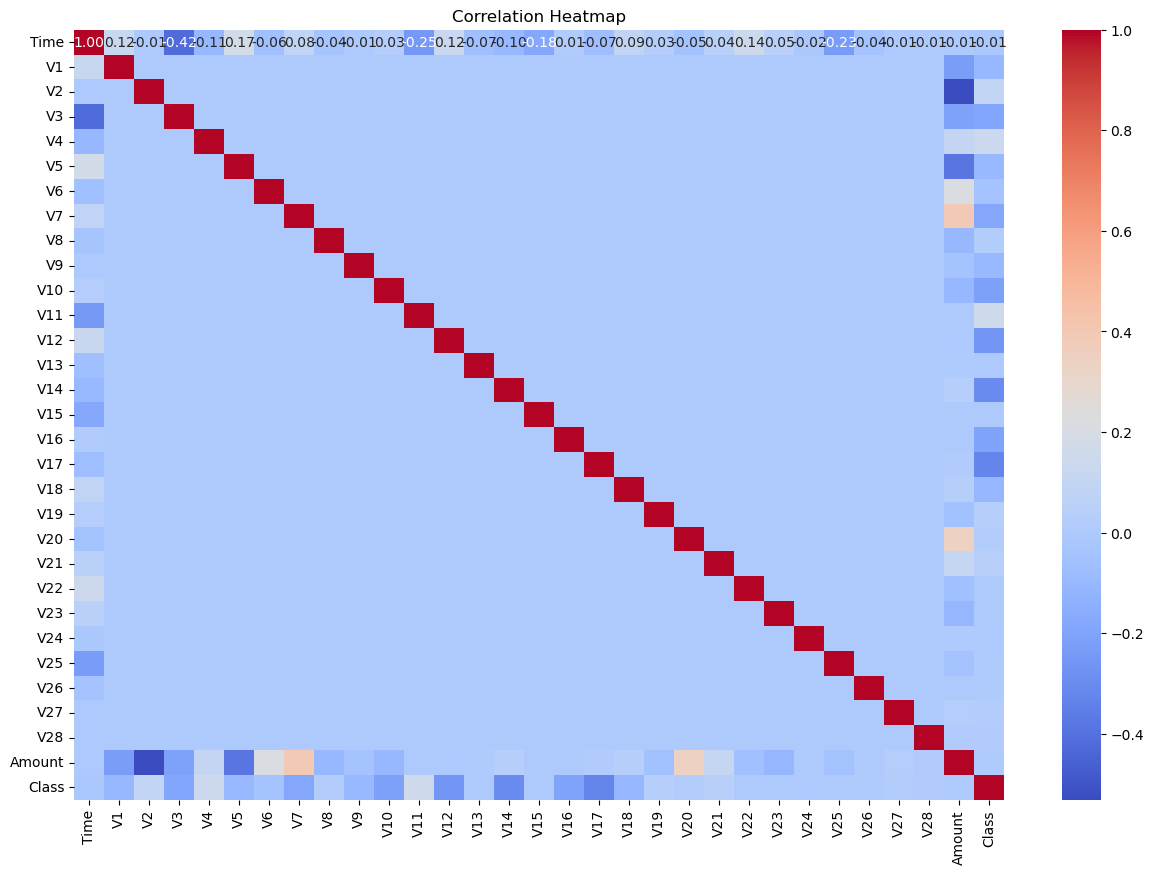

C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


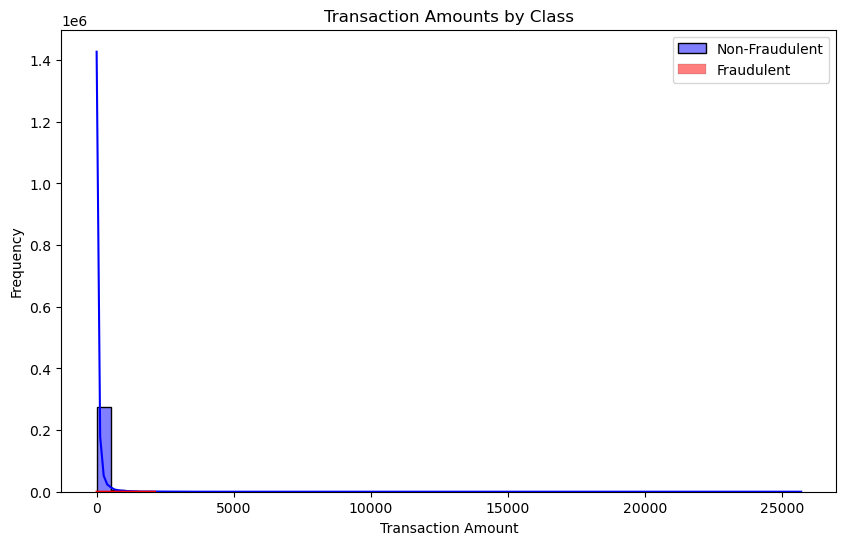

In [3]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(Genuine_data['Amount'], bins=50, kde=True, color='blue', label='Non-Fraudulent')
sns.histplot(Fraudulent_data['Amount'], bins=50, kde=True, color='red', label='Fraudulent')
plt.title('Transaction Amounts by Class')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Handle Class Imbalance using SMOTE

In [4]:
# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Display the new class distribution
print(y_res.value_counts())


Class
0    284315
1    284315
Name: count, dtype: int64


Split Data

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')


Training set shape: (398041, 30), (398041,)
Testing set shape: (170589, 30), (170589,)


Train Model

In [10]:
# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate Model

In [11]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate accuracy
training_accuracy = clf.score(X_train, y_train)
testing_accuracy = accuracy_score(y_test, y_pred)

print(f'Training Accuracy: {training_accuracy}')
print(f'Testing Accuracy: {testing_accuracy}')


[[85133    16]
 [    0 85440]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Training Accuracy: 1.0
Testing Accuracy: 0.9999062073170016


Feature Importance

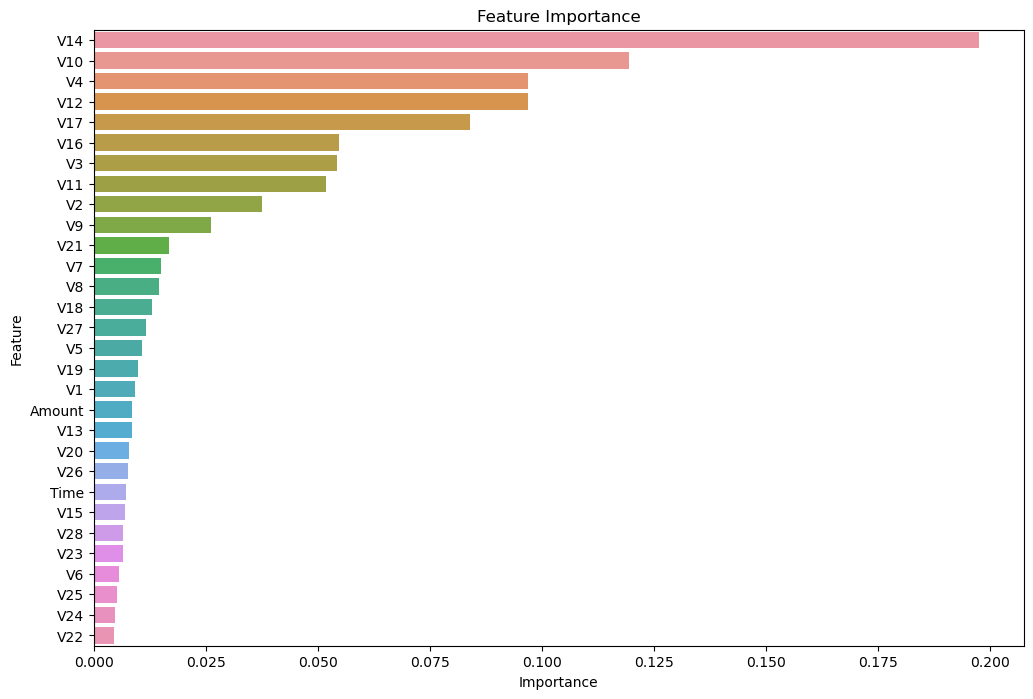

In [12]:
# Feature Importance
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


 Cross-Validation

In [13]:
# Cross-Validation
cv_scores = cross_val_score(clf, X_res, y_res, cv=5, scoring='f1')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean F1 Score: {cv_scores.mean()}')


Cross-Validation F1 Scores: [0.70195798 0.99982417 0.9995254  0.99970991 0.8075066 ]
Mean F1 Score: 0.9017048124738022


Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best F1 score: {grid_search.best_score_}')


Fitting 3 folds for each of 81 candidates, totalling 243 fits


### Conclusion
In this project,I developed a model to identify fraudulent credit card transactions. By preprocessing the data, handling class imbalance with SMOTE, and training a RandomForestClassifier, I achieved a training accuracy of 1.0 and a testing accuracy of 0.9999062073170016. Feature importance analysis showed that certain features were more significant in predicting fraud. Cross-validation and hyperparameter tuning helped optimize the model's performance, making it a robust solution for fraud detection.
